In [ ]:

import pandas as pd
#plt is an alias pointing to matplotlib.pyplot
import matplotlib.pyplot as plt
import numpy as np
#reads file to dataframe called dtf for dc and df for detroit
dtf = pd.read_csv("dc_crime_add_vars.csv")
df = pd.read_csv("RMS_Crime_Incidents.csv")
#number of rows and columns for dc and detroit
print(dtf.shape, "DC")
print(df.shape, 'Detroit')
#names of columns in dataset
print( "DC column names: " )
for x in list(dtf.columns):
  print(x)
#contents of the dataset, rows and columns of dc dataset
dtf.head()


(342867, 32) DC
(287371, 24) Detroit
DC column names: 
Unnamed: 0
X
REPORT_DAT
SHIFT
OFFENSE
METHOD
BLOCK
DISTRICT
PSA
WARD
ANC
NEIGHBORHOOD_CLUSTER
BLOCK_GROUP
CENSUS_TRACT
VOTING_PRECINCT
CCN
START_DATE
END_DATE
XBLOCK
YBLOCK
optional
date
year
month
day
hour
minute
second
EW
NS
quad
crimetype


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (8,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,Unnamed: 0,X,REPORT_DAT,SHIFT,OFFENSE,METHOD,BLOCK,DISTRICT,PSA,WARD,ANC,NEIGHBORHOOD_CLUSTER,BLOCK_GROUP,CENSUS_TRACT,VOTING_PRECINCT,CCN,START_DATE,END_DATE,XBLOCK,YBLOCK,optional,date,year,month,day,hour,minute,second,EW,NS,quad,crimetype
0,1,1,8/31/2008 8:47:00 PM,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2.0,206.0,2,2E,Cluster 4,000300 1,300.0,Precinct 6,8123749,8/30/2008 9:30:00 PM,8/31/2008 6:40:00 PM,-77.070209,38.913633,True,2008-08-31 20:47:00,2008,8,31,20,47,0,West,North,Northwest,Non-Violent
1,2,2,9/1/2008 12:45:00 AM,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2.0,208.0,2,2B,Cluster 6,005500 5,5500.0,Precinct 14,8123824,8/31/2008 7:30:00 PM,8/31/2008 11:30:00 PM,-77.045323,38.908564,True,2008-09-01 00:45:00,2008,9,1,0,45,0,West,North,Northwest,Non-Violent
2,3,3,9/1/2008 3:00:00 AM,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,1.0,101.0,2,2C,Cluster 8,005800 1,5800.0,Precinct 129,8123835,8/31/2008 11:00:00 PM,9/1/2008 2:00:00 AM,-77.027045,38.899057,True,2008-09-01 03:00:00,2008,9,1,3,0,0,East,North,Northeast,Non-Violent
3,4,4,9/9/2008 7:46:00 AM,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2.0,208.0,2,2B,Cluster 6,005301 3,5301.0,Precinct 15,8127848,9/9/2008 7:10:00 AM,9/9/2008 12:00:00 AM,-77.040089,38.909638,True,2008-09-09 07:46:00,2008,9,9,7,46,0,West,North,Northwest,Non-Violent
4,5,5,8/24/2008 8:00:00 PM,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,1.0,102.0,2,2C,Cluster 8,005900 1,5900.0,Precinct 143,8120153,8/5/2008 12:00:00 PM,8/5/2008 1:00:00 PM,-77.019377,38.894573,True,2008-08-24 20:00:00,2008,8,24,20,0,0,East,North,Northeast,Non-Violent


In [ ]:
#names of columns in dataset
print( "Detroit column names: " )
for x in list(df.columns):
  print(x)
#contents of the dataset, rows and columns of detroit dataset
df.head()

Detroit column names: 
X
Y
crime_id
report_number
address
offense_description
offense_category
state_offense_code
arrest_charge
charge_description
incident_timestamp
incident_time
day_of_week
hour_of_day
year
scout_car_area
precinct
block_id
neighborhood
council_district
zip_code
longitude
latitude
oid


,X,Y,crime_id,report_number,address,offense_description,offense_category,state_offense_code,arrest_charge,charge_description,incident_timestamp,incident_time,day_of_week,hour_of_day,year,scout_car_area,precinct,block_id,neighborhood,council_district,zip_code,longitude,latitude,oid
0,-83.110058,42.333821,3202076,1804220264,Jackson St & 31st St,CSC 2ND DEGREE - FORCIBLE CONTACT,SEX OFFENSES,1177,11007,CSC 2ND DEGREE - FORCIBLE CONTACT,2018/04/23 05:10:00+00,01:10:00,1,1,2018,0406,04,261635255002000,Chadsey Condon,6,48210,-83.110058,42.333821,54151892
1,-83.144252,42.420774,3063090,1705110359,Monica St & Santa Clara St,ASSAULT AND BATTERY/SIMPLE ASSAULT,ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,2017/05/12 01:10:00+00,21:10:00,4,21,2017,1208,12,261635385001004,Bagley,2,48221,-83.144252,42.420774,54151893
2,-83.221382,42.393837,3076335,1706120066,Lyndon St & Penrod St,ASSAULT AND BATTERY/SIMPLE ASSAULT,ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,2017/06/12 14:38:00+00,10:38:00,1,10,2017,0813,08,261635428001005,Rosedale Park,1,48223,-83.221382,42.393837,54151894
3,-83.145058,42.414675,3221136,1806060219,Grove St & Prairie St,ASSAULT AND BATTERY/SIMPLE ASSAULT,ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,2018/06/06 20:30:00+00,16:30:00,3,16,2018,1211,12,261635361001002,Fitzgerald/Marygrove,2,48221,-83.145058,42.414675,54151895
4,-83.110269,42.338770,3231922,1807010392,28th St & Rich St,ASSAULT AND BATTERY/SIMPLE ASSAULT,ASSAULT,1301,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,2018/07/02 07:57:00+00,03:57:00,1,3,2018,0403,04,261635254003018,Chadsey Condon,6,48210,-83.110269,42.338770,54151896


In [ ]:
#find unique timeframe of data
tf = sorted(set(list(dtf.year)))
print(tf)
#Results
print("Results: The dataset covers crime in DC from 2008 to 2017.")
#find unique timeframe of data
tf2 =  sorted(set(list(df.year)))
print(tf2)
#Results
print("Results: The dataset covers crime in Detroit from 1915 to 2020.")
#category of crime in DC
dc_offense=  sorted(set(list(dtf.OFFENSE)))
print(dc_offense)
#category of crimes in detroit.
det_offense= sorted(set(list(df.offense_category)))
print(det_offense)

[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
Results: The dataset covers crime in DC from 2008 to 2017.
[1915, 1918, 1920, 1951, 1961, 1963, 1973, 1976, 1977, 1978, 1980, 1981, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
Results: The dataset covers crime in Detroit from 1915 to 2020.
['ARSON', 'ASSAULT W/DANGEROUS WEAPON', 'BURGLARY', 'HOMICIDE', 'MOTOR VEHICLE THEFT', 'ROBBERY', 'SEX ABUSE', 'THEFT F/AUTO', 'THEFT/OTHER']
['AGGRAVATED ASSAULT', 'ARSON', 'ASSAULT', 'BURGLARY', 'DAMAGE TO PROPERTY', 'DANGEROUS DRUGS', 'DISORDERLY CONDUCT', 'EXTORTION', 'FAMILY OFFENSE', 'FORGERY', 'FRAUD', 'GAMBLING', 'HOMICIDE', 'JUSTIFIABLE HOMICIDE', 'KIDNAPPING', 'LARCENY', 'LIQUOR', 'MISCELLANEOUS', 'OBSTRUCTING JUDICIARY', 'OBSTRUCTING THE POLICE', 'OTHER', 'OUIL', 'ROBBERY', 'RUNAWAY', 'SEX OFFENSES', 'SEX

In [ ]:
#dc cleaning
#columns with unnecessary data in the dataframe
un_dtf = ["Unnamed: 0","DISTRICT","PSA", "NEIGHBORHOOD_CLUSTER", "BLOCK_GROUP","CENSUS_TRACT","VOTING_PRECINCT", "START_DATE", "END_DATE", "second"]
#deletes the unnecessary columns, inplace applies it to the dataframe in use
dtf.drop(un_dtf, axis = 1, inplace= True)
#checks if there is any incomplete data
print(dtf.isnull().sum())
#confirms deletion worked
dtf.head()


X             0
REPORT_DAT    0
SHIFT         0
OFFENSE       0
METHOD        0
BLOCK         0
WARD          0
ANC           0
CCN           0
XBLOCK        0
YBLOCK        0
optional      0
date          0
year          0
month         0
day           0
hour          0
minute        0
EW            0
NS            0
quad          0
crimetype     0
dtype: int64


,X,REPORT_DAT,SHIFT,OFFENSE,METHOD,BLOCK,WARD,ANC,CCN,XBLOCK,YBLOCK,optional,date,year,month,day,hour,minute,EW,NS,quad,crimetype
0,1,8/31/2008 8:47:00 PM,EVENING,THEFT/OTHER,OTHERS,3500 - 3599 BLOCK OF R STREET NW,2,2E,8123749,-77.070209,38.913633,True,2008-08-31 20:47:00,2008,8,31,20,47,West,North,Northwest,Non-Violent
1,2,9/1/2008 12:45:00 AM,MIDNIGHT,MOTOR VEHICLE THEFT,OTHERS,2000 - 2015 BLOCK OF O STREET NW,2,2B,8123824,-77.045323,38.908564,True,2008-09-01 00:45:00,2008,9,1,0,45,West,North,Northwest,Non-Violent
2,3,9/1/2008 3:00:00 AM,MIDNIGHT,THEFT/OTHER,OTHERS,700 - 799 BLOCK OF 11TH STREET NW,2,2C,8123835,-77.027045,38.899057,True,2008-09-01 03:00:00,2008,9,1,3,0,East,North,Northeast,Non-Violent
3,4,9/9/2008 7:46:00 AM,DAY,THEFT/OTHER,OTHERS,1700 - 1799 BLOCK OF P STREET NW,2,2B,8127848,-77.040089,38.909638,True,2008-09-09 07:46:00,2008,9,9,7,46,West,North,Northwest,Non-Violent
4,5,8/24/2008 8:00:00 PM,EVENING,MOTOR VEHICLE THEFT,OTHERS,500 - 599 BLOCK OF INDIANA AVENUE NW,2,2C,8120153,-77.019377,38.894573,True,2008-08-24 20:00:00,2008,8,24,20,0,East,North,Northeast,Non-Violent


In [ ]:
#Detroit Data cleaning
#columns with unrelated data in the dataframe
un_df = ["report_number", "X", "Y", "crime_id", "state_offense_code", "oid", "block_id", "address"]
#necessary Years
neY = [2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
#deletes the unnecessary columns, inplace applies it to the dataframe in use
df.drop(un_df, axis = 1, inplace= True)
#new dataframe from 2008 to 2017
det = df.loc[df['year'].isin(neY)]
#checks if there is any incomplete data
print(df.isnull().sum())
#confirms deletion worked
tf2 =  sorted(set(list(det.year)))
print(tf2)
#Results
print("Results: This dataset covers crime in Detroit from 2008 to 2017.")
det.head()

offense_description    0
offense_category       0
arrest_charge          0
charge_description     0
incident_timestamp     0
incident_time          0
day_of_week            0
hour_of_day            0
year                   0
scout_car_area         0
precinct               0
neighborhood           0
council_district       0
zip_code               0
longitude              0
latitude               0
dtype: int64
[2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017]
Results: This dataset covers crime in Detroit from 2008 to 2017.


,offense_description,offense_category,arrest_charge,charge_description,incident_timestamp,incident_time,day_of_week,hour_of_day,year,scout_car_area,precinct,neighborhood,council_district,zip_code,longitude,latitude
1,ASSAULT AND BATTERY/SIMPLE ASSAULT,ASSAULT,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,2017/05/12 01:10:00+00,21:10:00,4,21,2017,1208,12,Bagley,2,48221,-83.144252,42.420774
2,ASSAULT AND BATTERY/SIMPLE ASSAULT,ASSAULT,13001,ASSAULT AND BATTERY/SIMPLE ASSAULT,2017/06/12 14:38:00+00,10:38:00,1,10,2017,0813,08,Rosedale Park,1,48223,-83.221382,42.393837
6,INTIMIDATION / STALKING,ASSAULT,13003,INTIMIDATION / STALKING,2017/05/08 18:00:00+00,14:00:00,1,14,2017,0310,03,North Corktown,6,48208,-83.090074,42.336296
10,AGGRAVATED / FELONIOUS ASSAULT,AGGRAVATED ASSAULT,13002,AGGRAVATED / FELONIOUS ASSAULT,2017/04/12 08:03:00+00,04:03:00,3,4,2017,0805,08,Five Points,1,48219,-83.281766,42.428782
11,AGGRAVATED / FELONIOUS ASSAULT,AGGRAVATED ASSAULT,13002,AGGRAVATED / FELONIOUS ASSAULT,2017/05/29 02:35:00+00,22:35:00,7,22,2017,1211,12,Fitzgerald/Marygrove,2,48221,-83.145058,42.414675


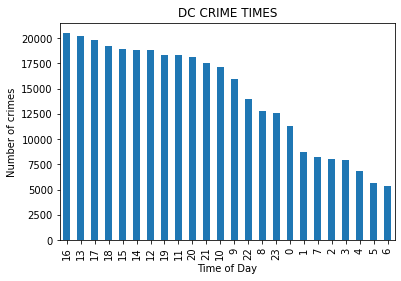

Results: peak crime time in DC is the Evening, then day, least is midnight


In [ ]:
#create bars
dtf['hour'].value_counts().plot.bar()
#add title and axis names
plt.title("DC CRIME TIMES")
plt.xlabel("Time of Day")
plt.ylabel("Number of crimes")

#show graphic
plt.show()

#Results
print("Results: peak crime time in DC is the Evening, then day, least is midnight")

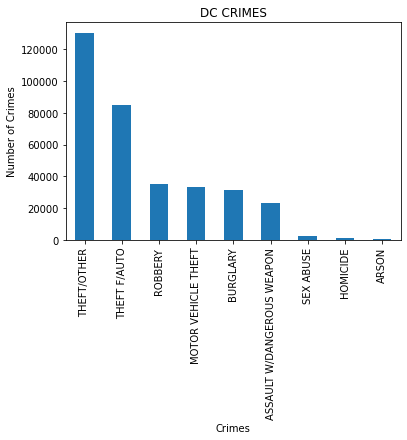

Results: Theft/Other is committed the most while Arson is committed the least in DC.


In [ ]:
#create bars
dtf['OFFENSE'].value_counts().plot.bar()

#add title and axis names
plt.title("DC CRIMES")
plt.xlabel("Crimes")
plt.ylabel("Number of Crimes")

#show graphic
plt.show()

#Results
print("Results: Theft/Other is committed the most while Arson is committed the least in DC.")

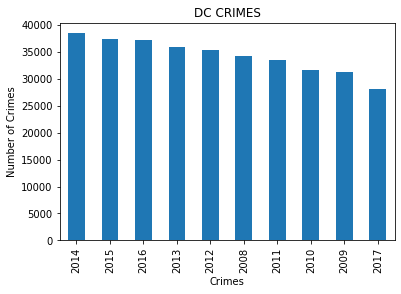

In [ ]:


#create bars
dtf['year'].value_counts().plot.bar()
#add title and axis names
plt.title("DC CRIMES")
plt.xlabel("Crimes")
plt.ylabel("Number of Crimes")

#show graphic
plt.show()

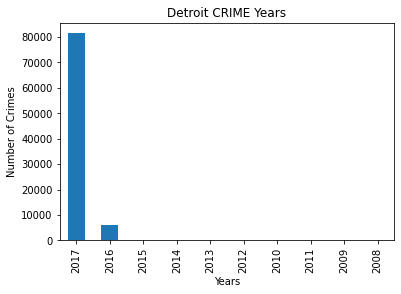

In [ ]:
#create bars
det['year'].value_counts().plot.bar()
#add title and axis names
plt.title("Detroit CRIME Years")
plt.xlabel("Years")
plt.ylabel("Number of Crimes")

#show graphic
plt.show()

count       88752
unique         30
top       LARCENY
freq        14575
Name: offense_category, dtype: object


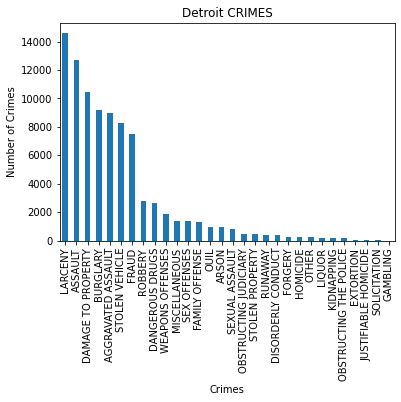

In [ ]:
#create bars
det['offense_category'].value_counts().plot.bar()
#add title and axis names
plt.title("Detroit CRIMES")
plt.xlabel("Crimes")
plt.ylabel("Number of Crimes")
print(det['offense_category'].describe())
#show graphic
plt.show()

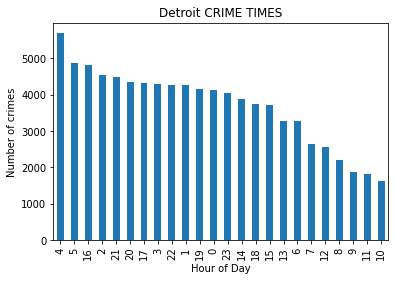

In [ ]:
#create bars
det['hour_of_day'].value_counts().plot.bar()

#add title and axis names
plt.title("Detroit CRIME TIMES")
plt.xlabel("Hour of Day")
plt.ylabel("Number of crimes")

#show graphic
plt.show()


In [ ]:
print(dtf["year"].value_counts())
print(dtf["OFFENSE"].value_counts())
det['hour_of_day'].describe()


2014    38448
2015    37316
2016    37183
2013    35919
2012    35385
2008    34208
2011    33574
2010    31597
2009    31210
2017    28027
Name: year, dtype: int64
THEFT/OTHER                   130435
THEFT F/AUTO                   85287
ROBBERY                        35267
MOTOR VEHICLE THEFT            33188
BURGLARY                       31292
ASSAULT W/DANGEROUS WEAPON     23436
SEX ABUSE                       2402
HOMICIDE                        1234
ARSON                            326
Name: OFFENSE, dtype: int64


count    88752.000000
mean        11.602420
std          7.408995
min          0.000000
25%          4.000000
50%         13.000000
75%         18.000000
max         23.000000
Name: hour_of_day, dtype: float64